# Introduction to Neurokernel's API

This notebook illustrates how to define and connect local processing unit (LPU) models using Neurokernel.

### Background

An LPU comprises two distinct populations of neurons [(Chiang et al., 2011)](#chiang_three-dimensional_2011): *local* neurons may only project to other neurons in the LPU, while *projection* neurons may project both to local neurons and neurons in other LPUs. All synapses between neurons are comprised by *internal connectivity* patterns. LPUs are linked by *inter-LPU connectivity* patterns that map one LPU's outputs to inputs in other LPUs. The general structure of an LPU is shown below:

<img src='files/generic-lpus.jpg' align='middle'/>

### Defining an LPU Interface

#### Interface Ports

All communication between LPUs must pass through *ports* that are internally associated with modeling elements that must emit or receive external data. An LPU's *interface* is defined as the set of ports it exposes to other LPUs. Each port is defined by a unique identifier string and attributes that indicate whether 
- it transmits *spikes* (i.e., boolean values) or *graded potentials* (i.e., floating point numbers) at each step of model execution and whether
- it accepts *input* or emits *output*.

To facilitate management of a large numbers of ports, Neurokernel requires that port identifiers conform to a hierarchical format similar to that used to label files or [elements in structured documents](http://www.w3.org/TR/xpath/).  Each identifier may comprise multiple *levels* joined by separators (/ and []). Neurokernel also defines an extended format for selecting multiple ports with a single *selector*; a selector that cannot be expanded to an explicit list of individual port identifiers is said to be *ambiguous*. Rather than define a formal grammar for this format, the following table depicts examples of how it may be used to refer to multiple ports.

<table>
    <tr>
    <th>Identifier/Selector</th>
    <th>Comments</th>
    </tr>
    <tr>
    <td><tt>/med/L1[0]</tt></td>
    <td>selects a single port</td>
    </tr>
    <tr>
    <td><tt>/med/L1[0]</tt></td>
    <td>equivalent to <tt>/med/L1[0]</tt></td>
    </tr>
    <tr>
    <td><tt>/med+/L[1]</tt></td>
    <td>equivalent to <tt>/med/L1[0]</tt></td>
    </tr>
    <tr>
    <td><tt>/med[L1,L2][0]</tt></td>
    <td>selects two ports</td>
    </tr>
    <tr>
    <td><tt>/med/L1[0,1]</tt></td>
    <td>another example of two ports</td>
    </tr>
    <tr>
    <td><tt>/med/L1[0],/med/L1[1]</tt></td>
    <td>equivalent to <tt>/med/L1[0,1]</tt></td>
    </tr>
    <tr>
    <td><tt>/med/L1[0:10]</tt></td>
    <td>selects a range of 10 ports</td>
    </tr>
    <tr>
    <td><tt>/med/L1/*</tt></td>
    <td>selects all ports starting with <tt>/med/L1</tt></td>
    </tr>
    <tr>
    <td><tt>(/med/L1,/med/L2)+[0]</tt></td>
    <td>equivalent to <tt>/med/[L1,L2][0]</tt></td>
    </tr>
    <tr>
    <td><tt>/med/[L1,L2].+[0:2]</tt></td>
    <td>equivalent to <tt>/med/L1[0],/med/L2[1]</tt></td>
    </tr>
</table>

#### Inter-LPU Connectivity Patterns

All connections between LPUs must be defined in inter-LPU connectivity patterns that map the output ports of one LPU to the input ports of another LPU. Since individual LPUs may internally implement multiplexing of input signals to a single destination in different ways, the LPU interface only permits fan-out from individual output ports to multiple input ports; connections from multiple output ports may not converge on a single input port. A single pattern may define connections in both directions.

A connectivity pattern between two LPUs is fully specified by the identifiers and attributes of the ports in its two interfaces and the directed graph of connections defined between them. An example of such pattern defined between ports <tt>/lam[0:6]</tt> and <tt>/med[0:5]</tt> follows:

<table>
    <tr>
    <th>Port</th><th>Interface</th><th>I/O</th><th>Port Type</th>
    </tr>
    <tr>
    <td><tt>/lam[0]</tt></td><td><tt>0</tt></td><td><tt>in</tt></td><td><tt>graded potential</tt></td>
    </tr>
    <tr>
    <td><tt>/lam[1]</tt></td><td><tt>0</tt></td><td><tt>in</tt></td><td><tt>graded potential</tt></td>
    </tr>
    <tr>
    <td><tt>/lam[2]</tt></td><td><tt>0</tt></td><td><tt>out</tt></td><td><tt>graded potential</tt></td>
    </tr>
    <tr>
    <td><tt>/lam[3]</tt></td><td><tt>0</tt></td><td><tt>out</tt></td><td><tt>spiking</tt></td>
    </tr>
    <tr>
    <td><tt>/lam[4]</tt></td><td><tt>0</tt></td><td><tt>out</tt></td><td><tt>spiking</tt></td>
    </tr>
    <tr>
    <td><tt>/lam[5]</tt></td><td><tt>0</tt></td><td><tt>out</tt></td><td><tt>spiking</tt></td>
    </tr>
    <tr>
    <td><tt>/med[0]</tt></td><td><tt>1</tt></td><td><tt>out</tt></td><td><tt>graded potential</tt></td>
    </tr>
    <tr>
    <td><tt>/med[1]</tt></td><td><tt>1</tt></td><td><tt>out</tt></td><td><tt>graded potential</tt></td>
    </tr>
    <tr>
    <td><tt>/med[2]</tt></td><td><tt>1</tt></td><td><tt>out</tt></td><td><tt>graded potential</tt></td>
    </tr>
    <tr>
    <td><tt>/med[3]</tt></td><td><tt>1</tt></td><td><tt>in</tt></td><td><tt>spiking</tt></td>
    </tr>
    <tr>
    <td><tt>/med[4]</tt></td><td><tt>1</tt></td><td><tt>in</tt></td><td><tt>spiking</tt></td>
    </tr>
</table>

<table>
    <tr>
    <th>From</th><th>To</th>
    </tr>
    <tr>
    <td><tt>/lam[0]</tt></td><td><tt>/med[0]</tt></td>
    </tr>
    <tr>
    <td><tt>/lam[0]</tt></td><td><tt>/med[1]</tt></td>
    </tr>
    <tr>
    <td><tt>/lam[1]</tt></td><td><tt>/med[2]</tt></td>
    </tr>
    <tr>
    <td><tt>/med[3]</tt></td><td><tt>/lam[3]</tt></td>
    </tr>
    <tr>
    <td><tt>/med[4]</tt></td><td><tt>/lam[4]</tt></td>
    </tr>
    <tr>
    <td><tt>/med[4]</tt></td><td><tt>/lam[5]</tt></td>
    </tr>
</table>


### Using Neurokernel's API

#### Setting up LPU Interfaces and Patterns

Neurokernel provides Python classes for defining LPUs and connectivity patterns that can be used to link them together. The former (``neurokernel.core.Module`` for LPUs that don't access the GPU and ``neurokernel.core_gpu.Module`` for LPUs that do) requires an LPU designer to implement all of the LPU's internals from the ground up; the latter class places no explicit constraints upon how an LPU uses GPU resources. In order to enable independently implemented LPUs to communicate with each other, each LPU must implement a method called ``run_step()`` called during each step of execution that consumes incoming data from other LPUs and produces data for transmission to other LPUs. The example below generates random data in its ``run_step()`` method:

In [1]:
import numpy as np

from neurokernel.core_gpu import Module

class MyModule(Module):

    # Process incoming data and set outgoing data:
    def run_step(self):       
        super(MyModule, self).run_step()

        # Display input graded potential data:
        self.logger.info('input gpot port data: '+str(self.pm['gpot'][self.in_gpot_ports]))
        
        # Display input spike data:
        self.logger.info('input spike port data: '+str(self.pm['spike'][self.in_spike_ports]))

        # Output random graded potential data:
        out_gpot_data = gpuarray.to_gpu(np.random.rand(len(self.out_gpot_ports)))
        self.pm['gpot'][self.out_gpot_ports] = out_gpot_data
        self.log_info('output gpot port data: '+str(out_gpot_data))
            
        # Randomly select output ports to emit spikes:
        out_spike_data = gpuarray.to_gpu(np.random.randint(0, 2, len(self.out_spike_ports)))
        self.pm['spike'][self.out_spike_ports] = out_spike_data
        self.log_info('output spike port data: '+str(out_spike_data))

Notice that every LPU instance must be associated with a unique identifier (``id``). An LPU contains a port-mapper attribute (``pm``) that maps input and output ports to a data array that may be accessed by the LPU's internal implementation; after each step of execution, the array associated with the port-mapper is updated with input data from source LPUs while output data from the array is transmitted to destination LPUs.  

One can instantiate the above LPU class as follows: 

In [2]:
from neurokernel.plsel import Selector,SelectorMethods

m1_int_sel_in_gpot = Selector('/a/in/gpot[0:2]')
m1_int_sel_out_gpot = Selector('/a/out/gpot[0:2]')
m1_int_sel_in_spike = Selector('/a/in/spike[0:2]')
m1_int_sel_out_spike = Selector('/a/out/spike[0:2]')
m1_int_sel = m1_int_sel_in_gpot+m1_int_sel_out_gpot+\
             m1_int_sel_in_spike+m1_int_sel_out_spike
m1_int_sel_in = m1_int_sel_in_gpot+m1_int_sel_in_spike
m1_int_sel_out = m1_int_sel_out_gpot+m1_int_sel_out_spike
m1_int_sel_gpot = m1_int_sel_in_gpot+m1_int_sel_out_gpot
m1_int_sel_spike = m1_int_sel_in_spike+m1_int_sel_out_spike
N1_gpot = SelectorMethods.count_ports(m1_int_sel_gpot)
N1_spike = SelectorMethods.count_ports(m1_int_sel_spike)

m2_int_sel_in_gpot = Selector('/b/in/gpot[0:2]')
m2_int_sel_out_gpot = Selector('/b/out/gpot[0:2]')
m2_int_sel_in_spike = Selector('/b/in/spike[0:2]')
m2_int_sel_out_spike = Selector('/b/out/spike[0:2]')
m2_int_sel = m2_int_sel_in_gpot+m2_int_sel_out_gpot+\
             m2_int_sel_in_spike+m2_int_sel_out_spike
m2_int_sel_in = m2_int_sel_in_gpot+m2_int_sel_in_spike
m2_int_sel_out = m2_int_sel_out_gpot+m2_int_sel_out_spike
m2_int_sel_gpot = m2_int_sel_in_gpot+m2_int_sel_out_gpot
m2_int_sel_spike = m2_int_sel_in_spike+m2_int_sel_out_spike
N2_gpot = SelectorMethods.count_ports(m2_int_sel_gpot)
N2_spike = SelectorMethods.count_ports(m2_int_sel_spike)

Using the ports in each of the above LPUs' interfaces, one can define a connectivity pattern between them as follows:

In [3]:
from neurokernel.pattern import Pattern

pat12 = Pattern(m1_int_sel, m2_int_sel)
pat12.interface[m1_int_sel_out_gpot] = [0, 'in', 'gpot']
pat12.interface[m1_int_sel_in_gpot] = [0, 'out', 'gpot']
pat12.interface[m1_int_sel_out_spike] = [0, 'in', 'spike']
pat12.interface[m1_int_sel_in_spike] = [0, 'out', 'spike']
pat12.interface[m2_int_sel_in_gpot] = [1, 'out', 'gpot']
pat12.interface[m2_int_sel_out_gpot] = [1, 'in', 'gpot']
pat12.interface[m2_int_sel_in_spike] = [1, 'out', 'spike']
pat12.interface[m2_int_sel_out_spike] = [1, 'in', 'spike']

pat12['/a/out/gpot[0]', '/b/in/gpot[0]'] = 1
pat12['/a/out/gpot[1]', '/b/in/gpot[1]'] = 1
pat12['/b/out/gpot[0]', '/a/in/gpot[0]'] = 1
pat12['/b/out/gpot[1]', '/a/in/gpot[1]'] = 1
pat12['/a/out/spike[0]', '/b/in/spike[0]'] = 1
pat12['/a/out/spike[1]', '/b/in/spike[1]'] = 1
pat12['/b/out/spike[0]', '/a/in/spike[0]'] = 1
pat12['/b/out/spike[1]', '/a/in/spike[1]'] = 1

### A Simple Example: Creating an LPU

To obviate the need to implement an LPU completely from scratch, the [Neurodriver](https://github.com/neurokernel/neurodriver) package provides a functional LPU class (``neurokernel.LPU.LPU.LPU``) that supports the following neuron and synapse models:

* Leaky Integrate-and-Fire (LIF) neuron (spiking neuron)
* Morris-Lecar (ML) neuron (graded potential neuron), 
* Alpha function synapse
* Conductance-based synapse (referred to as ``power_gpot_gpot``).  

Note that although the ML model can in principle be configured as a spiking neuron model, the implementation in the LPU class is configured to output its membrane potential.

Alpha function synapses may be used to connect any type of presynaptic neuron to any type of of postsynaptic neuron; the neuron presynaptic to a conductance-based synapse must be a graded potential neuron.

It should be emphasized that the above LPU implementation and the currently support models are not necessarily optimal and may be replaced with improved implementations in the future.

The ``LPU`` class provided by Neurodriver may be instantiated with a graph describing its internal structure. The graph must be stored in [GEXF](http://gexf.net) file format with nodes and edges respectively corresponding to instances of the supported neuron and synapse models. To facilitate construction of an LPU, the [networkx](http://networkx.github.io) Python package may be used to set the parameters of the model instances. For example, the following code defines a simple network consisting of an LIF neuron with a single synaptic connection to an ML neuron; the synaptic current elicited by the LIF neuron's spikes is modeled by an alpha function:

In [4]:
import numpy as np
import networkx as nx

G = nx.MultiDiGraph()
# add a neuron node with LeakyIAF model
G.add_node('neuron0',                                 # UID
           **{'class': 'LeakyIAF',                      # component model
            'name': 'neuron_0',                       # component name
            'initV': np.random.uniform(-60.0, -25.0), # initial membrane voltage
            'reset_potential': -67.5489770451,        # reset voltage
            'threshold': -25.1355161007,              # spike threshold
            'resting_potential': 0.0,                 # resting potential
            'resistance': 1024.45570216,              # membrane resistance
            'capacitance': 0.0669810502993})          # membrane capacitance

# The above neuron is a projection neuron,
# create an output port for it
G.add_node('neuron0_port',                    # UID
           **{'class': 'Port',                  # indicates it is a port
            'name': 'neuron_0_output_port',   # name of the port
            'selector': '/a[0]',              # selector of the port
            'port_io': 'out',                 # indicates it is an output port
            'port_type': 'spike'})            # indicates it is a spike port

# connect the neuron node and its port
G.add_edge('neuron0', 'neuron0_port')

# add a second neuron node with MorrisLecar model
G.add_node('neuron1',
           **{'class': "MorrisLecar",                  
            'name': 'neuron_1',
            'V1': 30.0,
            'V2': 15.0,
            'V3': 0.0,
            'V4': 30.0,
            'phi': 25.0,
            'offset': 0.0,
            'V_L': -50.,
            'V_Ca': 100.0,
            'V_K': -70.0,
            'g_Ca': 1.1,
            'g_K': 2.0,
            'g_L': 0.5,
            'initV': -52.14,
            'initn': 0.03,})

# add a synapse node with AlphaSynapse model
G.add_node('synapse_0_1',
           **{'class': 'AlphaSynapse',
            'name': 'synapse_0_1',
            'ar': 1.1*1e2,        # decay rate
            'ad': 1.9*1e3,        # rise rate
            'reverse': 65.0,      # reversal potential
            'gmax': 2*1e-3,       # maximum conductance
            })

# connect presynaptic neuron to synapse
G.add_edge('neuron0', 'synapse_0_1')
# connect synapse to postsynaptic neuron
G.add_edge('synapse_0_1', 'neuron1')

# export the graph to GEXF file
nx.write_gexf(G, 'simple_lpu.gexf.gz')

We can prepare a simple pulse input and save it in an HDF5 file to pass to ``neuron_0`` as follows:

In [5]:
import h5py

dt = 1e-4           # time resolution of model execution in seconds
dur = 1.0           # duration in seconds
Nt = int(dur/dt) # number of data points in time

start = 0.3
stop = 0.6

I_max = 0.6
t = np.arange(0, dt*Nt, dt)
I = np.zeros((Nt, 1), dtype=np.double)
I[np.logical_and(t>start, t<stop)] = I_max

uids = np.array(['neuron0'])

with h5py.File('simple_input.h5', 'w') as f:
    f.create_dataset('I/uids', data=uids)
    f.create_dataset('I/data', (Nt, 1),
                     dtype=np.double,
                     data=I)

The LPU defined earlier can be instantiated and executed as follows:

In [6]:
from neurokernel.tools.mpi_run import mpi_run

def run_core_gpu():
    from neurokernel.core_gpu import Manager
    from neurokernel.LPU.LPU import LPU

    from neurokernel.LPU.InputProcessors.FileInputProcessor import FileInputProcessor
    from neurokernel.LPU.OutputProcessors.FileOutputProcessor import FileOutputProcessor
    
    from neurokernel.tools.logging import setup_logger

    dt = 1e-4
    dur = 1.0         
    steps = int(dur/dt) 

    logger = setup_logger(file_name="log.out", screen=False)


    man = Manager()
    lpu_file = 'simple_lpu.gexf.gz'
    (comp_dict, conns) = LPU.lpu_parser(lpu_file)

    fip_file = 'simple_input.h5'
    fl_input_processor = FileInputProcessor(fip_file)
    fl_output_processor = FileOutputProcessor([('V',None),('spike_state',None)], 'simple_output.h5', sample_interval=1)

    man.add(LPU, 'simple', dt, comp_dict, conns,
            device=0, input_processors = [fl_input_processor],
            output_processors = [fl_output_processor], debug=True)

    man.spawn()
    man.start(steps=steps)
    man.wait()

    
#Use mpi_run_manager to execute the manager in notebook
from subprocess import CalledProcessError
try:
    output = mpi_run(run_core_gpu, log = True)
except CalledProcessError:
    with open('neurokernel.log', 'r') as f:
        print f.read()
print(output)

#This should be replaced by the following in regular code
#man.spawn()
#man.start(steps=args.steps)
#man.wait()


MPI_RUN_SUCCESS: run_core_gpu



The spikes emitted by ``neuron_0`` and the membrane potential of ``neuron_1`` are respectively stored in ``simple_output_spike.h5`` and ``simple_output_gpot.h5``. These can be visualized using a built-in LPU output visualization class that can render the output in video and image format:

In [7]:
import matplotlib as mpl
mpl.use('agg')
import matplotlib.pyplot as plt

import neurokernel.LPU.utils.visualizer as vis
import networkx as nx
import h5py

# Temporary fix for bug in networkx 1.8:
nx.readwrite.gexf.GEXF.convert_bool = \
    {'false':False, 'False':False,
      'true':True, 'True':True}

V = vis.visualizer()

# create a plot for current input injected to 'neuron0'
V.add_LPU('simple_input.h5', LPU='Input', is_input = True)
V.add_plot({'type': 'waveform', 'uids': [['neuron0']], 'variable': 'I', 'title': 'Input'}, 'input_Input')

# create a plot for spike output from 'neuron0'
V.add_LPU('simple_output.h5',
          gexf_file='./simple_lpu.gexf.gz', LPU='Simple LPU (Spikes)')
V.add_plot({'type':'raster', 'uids': [['neuron0']], 'variable': 'spike_state',
            'yticks': [0], 'yticklabels': [0], 'title': 'Output - Neuron 0'},
            'Simple LPU (Spikes)')

# create a plot for membrane potential output from 'neuron1'
V.add_LPU('simple_output.h5',
          gexf_file='./simple_lpu.gexf.gz', LPU='Simple LPU (Graded Potential)')
V.add_plot({'type': 'waveform', 'uids': [['neuron1']], 'variable': 'V', 'title': 'Output - Neuron 1',
            'ylim': [-70.0,-10.0]},
            'Simple LPU (Graded Potential)')

V._update_interval = None
V.rows = 3
V.cols = 1
V.fontsize = 8
V.dt = 0.0001
V.xlim = [0, 1.0]
V.figsize = (6, 4)
V.run('simple_output.png')

# Don't automatically display the output image:
plt.close(plt.gcf())


Here is the generated image of the output:

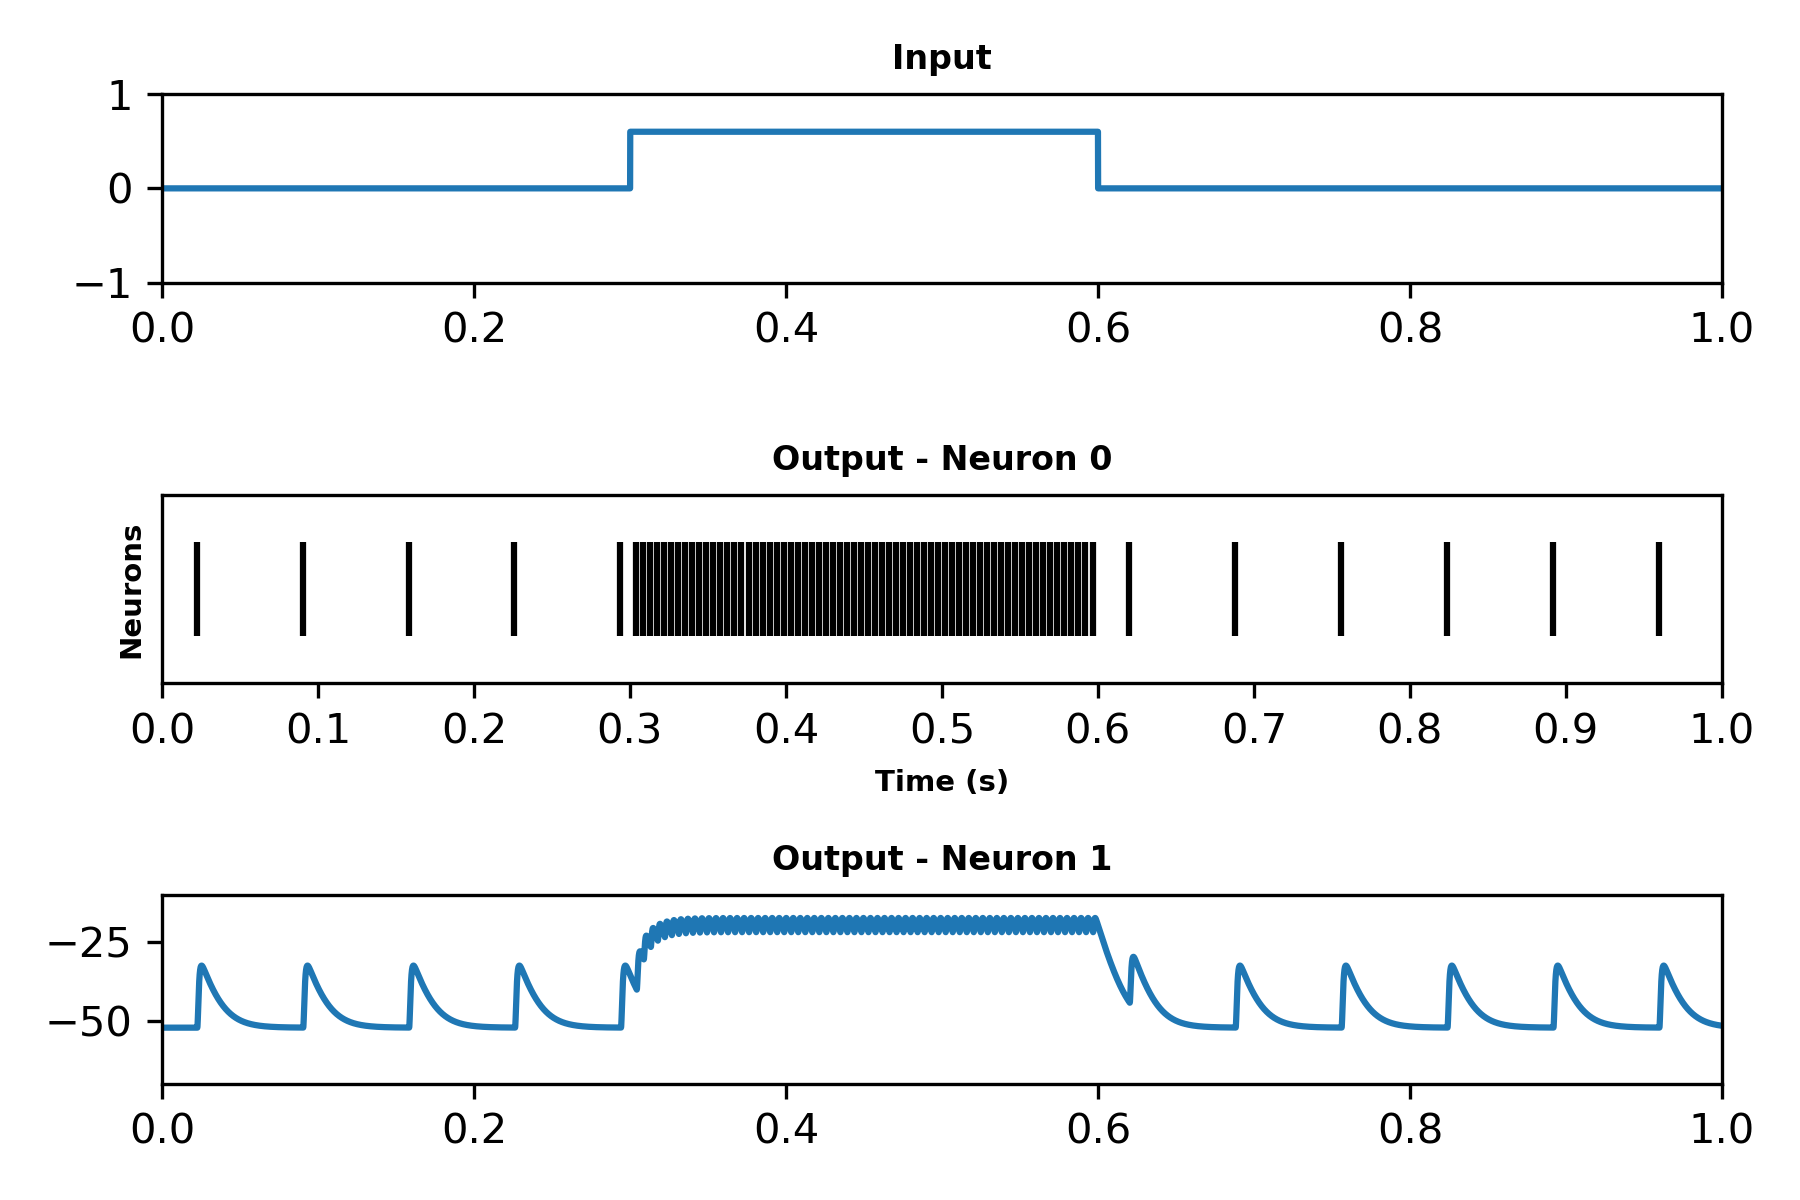

In [8]:
from IPython.display import Image

Image(filename = 'simple_output.png')

### A More Complex Example: Connecting LPUs

The following example demonstrates the creation and connection of two LPUs containing multiple neurons with a connectivity pattern. The number of neurons and synapses in each of the LPUs' internal populations are randomly generated: the number of neurons in each populations is randomly selected between 30 to 40. The LPUs' projection neurons - as well as populations of input neurons presynaptic to the LPUs that accept an input stimulus - are modeled as LIF neurons, while each of the local neurons is modeled as either an LIF neuron or a graded potential ML neuron. Synaptic currents are modeled with alpha functions. Synapses between the LPU's local and projection neurons, as well as synpases between the input neurons and the LPU's internal neurons, are also created randomly; roughly half of the total number of pairs of neurons are connected. 

To generate the LPUs and input signals used in this demo, we run the following script:

In [9]:
import numpy as np
import sys
sys.path.append('../examples/intro/data')

from gen_generic_lpu import create_lpu, create_input

for i in [0,1]:
    
    #Set the random seed
    np.random.seed(i)
    
    #Define file names
    lpu_name =      'lpu_%i' % i
    lpu_file_name = 'generic_lpu_%i.gexf.gz'  % i
    in_file_name =  'generic_lpu_%i_input.h5' % i
    
    #Define variables
    dt  = 1e-4
    dur = 1.0
    start = 0.3
    stop = 0.6
    I_max = 0.6
    neu_num = [np.random.randint(31, 40) for _ in xrange(3)]
    
    #Create the LPU and input files
    create_lpu(lpu_file_name, lpu_name, *neu_num)
    create_input(in_file_name, neu_num[0], dt, dur, start, stop, I_max)

Since the neurons and synapses in the generated LPUs are stored in GEXF format, they can be easily accessed using networkx and [pandas](http://pandas.pydata.org). Neurokernel provides a convenience function to convert between networkx graphs and pandas' DataFrame class:

In [10]:
import networkx as nx
import neurokernel.tools.graph
g_0 = nx.read_gexf('generic_lpu_0.gexf.gz')
df_comp_0, df_conn_0 = neurokernel.tools.graph.graph_to_df(g_0)

Say one wishes to explore several LIF neurons in LPU 0. Here is how to access their parameters:

In [11]:
df_comp_0[df_comp_0['class'] == 'LeakyIAF'][25:30][['name','class',
                                'initV','reset_potential','resting_potential',
                                'threshold','resistance','capacitance']]

,name,class,initV,reset_potential,resting_potential,threshold,resistance,capacitance
sensory_4,sensory_4_s,LeakyIAF,-50.457,-67.549,0,-25.1355,1002.45,0.0669811
sensory_5,sensory_5_s,LeakyIAF,-31.5741,-67.549,0,-25.1355,1002.45,0.0669811
sensory_6,sensory_6_s,LeakyIAF,-46.2525,-67.549,0,-25.1355,1002.45,0.0669811
sensory_8,sensory_8_s,LeakyIAF,-37.314,-67.549,0,-25.1355,1002.45,0.0669811
sensory_9,sensory_9_s,LeakyIAF,-26.4996,-67.549,0,-25.1355,1002.45,0.0669811


Say one wishes to find the parameters of the synapses linking neuron ``output_31_s`` to other destination neurons; these can be accessed using the following query:

In [12]:
ind = df_comp_0['name'].str.startswith('proj_31_s-')
df_comp_0[ind][['name','class','ar','ad','reverse','gmax']]

,name,class,ar,ad,reverse,gmax
synapse_proj_31_s-local_0_g,proj_31_s-local_0_g,AlphaSynapse,110,1900,10,3.1e-07
synapse_proj_31_s-local_12_g,proj_31_s-local_12_g,AlphaSynapse,110,1900,10,3.1e-07
synapse_proj_31_s-local_14_g,proj_31_s-local_14_g,AlphaSynapse,110,1900,10,3.1e-07
synapse_proj_31_s-local_17_g,proj_31_s-local_17_g,AlphaSynapse,110,1900,10,3.1e-07
synapse_proj_31_s-local_18_g,proj_31_s-local_18_g,AlphaSynapse,110,1900,10,3.1e-07
synapse_proj_31_s-local_21_g,proj_31_s-local_21_g,AlphaSynapse,110,1900,10,3.1e-07
synapse_proj_31_s-local_23_g,proj_31_s-local_23_g,AlphaSynapse,110,1900,10,3.1e-07
synapse_proj_31_s-local_25_g,proj_31_s-local_25_g,AlphaSynapse,110,1900,10,3.1e-07
synapse_proj_31_s-local_26_g,proj_31_s-local_26_g,AlphaSynapse,110,1900,10,3.1e-07
synapse_proj_31_s-local_2_g,proj_31_s-local_2_g,AlphaSynapse,110,1900,10,3.1e-07


Once the configuration and the input stimulus are ready, we execute the entire model with connections defined between the LPUs:

In [13]:
import random

import neurokernel.core_gpu as core_gpu
import neurokernel.pattern as pattern
import neurokernel.plsel as plsel
from neurokernel.LPU.LPU import LPU

from neurokernel.LPU.InputProcessors.FileInputProcessor import FileInputProcessor
from neurokernel.LPU.OutputProcessors.FileOutputProcessor import FileOutputProcessor


#Set the random seed
random.seed(0)

#Load the manager
man = core_gpu.Manager()

#Define filenames
lpu_file_0 = 'generic_lpu_0.gexf.gz'
in_file_0  = 'generic_lpu_0_input.h5'
out_file_0 = 'generic_lpu_0_output.h5'
lpu_file_1 = 'generic_lpu_1.gexf.gz'
in_file_1  = 'generic_lpu_1_input.h5'
out_file_1 = 'generic_lpu_1_output.h5'

#Extract the LPU graphs
comp_dict_0, conns_0 = LPU.lpu_parser(lpu_file_0)
comp_dict_1, conns_1 = LPU.lpu_parser(lpu_file_1)

#Attach file processors to LPU 0
fl_input_processor_0 = FileInputProcessor(in_file_0)
fl_output_processor_0 = FileOutputProcessor(
            [('V',None),('spike_state',None)],
            out_file_0, sample_interval=1)

lpu_0_id = 'lpu_0'
man.add(LPU, lpu_0_id, dt, comp_dict_0, conns_0,
            input_processors = [fl_input_processor_0],
            output_processors = [fl_output_processor_0],
            device=0,
            debug=False, time_sync=False)

#Attach file processors to LPU 1
fl_input_processor_1 = FileInputProcessor(in_file_1)
fl_output_processor_1 = FileOutputProcessor(
            [('V',None),('spike_state',None)],
            out_file_1, sample_interval=1)

lpu_1_id = 'lpu_1'
man.add(LPU, lpu_1_id, dt, comp_dict_1, conns_1,
            input_processors = [fl_input_processor_1],
            output_processors = [fl_output_processor_1],
            device=1,
            debug=False, time_sync=False)

In [6]:
# Find all output and input port selectors in each LPU:
out_ports_spk_0 = plsel.Selector(
                ','.join(LPU.extract_out_spk(comp_dict_0, 'id')[0]))
out_ports_gpot_0 = plsel.Selector(
                ','.join(LPU.extract_out_gpot(comp_dict_0, 'id')[0]))

out_ports_spk_1 = plsel.Selector(
                ','.join(LPU.extract_out_spk(comp_dict_1, 'id')[0]))
out_ports_gpot_1 = plsel.Selector(
                ','.join(LPU.extract_out_gpot(comp_dict_1, 'id')[0]))

in_ports_spk_0 = plsel.Selector(
                ','.join(LPU.extract_in_spk(comp_dict_0, 'id')[0]))
in_ports_gpot_0 = plsel.Selector(
                ','.join(LPU.extract_in_gpot(comp_dict_0, 'id')[0]))

in_ports_spk_1 = plsel.Selector(
                ','.join(LPU.extract_in_spk(comp_dict_1, 'id')[0]))
in_ports_gpot_1 = plsel.Selector(
                ','.join(LPU.extract_in_gpot(comp_dict_1, 'id')[0]))

out_ports_0 = plsel.Selector.union(out_ports_spk_0, out_ports_gpot_0)
out_ports_1 = plsel.Selector.union(out_ports_spk_1, out_ports_gpot_1)

in_ports_0 = plsel.Selector.union(in_ports_spk_0, in_ports_gpot_0)
in_ports_1 = plsel.Selector.union(in_ports_spk_1, in_ports_gpot_1)

# Initialize a connectivity pattern between the two sets of port
# selectors:
pat = pattern.Pattern(plsel.Selector.union(out_ports_0, in_ports_0),
                      plsel.Selector.union(out_ports_1, in_ports_1))

# Create connections from the ports with identifiers matching the output
# ports of one LPU to the ports with identifiers matching the input
# ports of the other LPU:
N_conn_spk_0_1 = min(len(out_ports_spk_0), len(in_ports_spk_1))
N_conn_gpot_0_1 = min(len(out_ports_gpot_0), len(in_ports_gpot_1))
for src, dest in zip(random.sample(out_ports_spk_0.identifiers,
                                   N_conn_spk_0_1),
                     random.sample(in_ports_spk_1.identifiers,
                                   N_conn_spk_0_1)):
    pat[src, dest] = 1
    pat.interface[src, 'type'] = 'spike'
    pat.interface[dest, 'type'] = 'spike'
for src, dest in zip(random.sample(out_ports_gpot_0.identifiers,
                                   N_conn_gpot_0_1),
                     random.sample(in_ports_gpot_1.identifiers,
                                   N_conn_gpot_0_1)):
    pat[src, dest] = 1
    pat.interface[src, 'type'] = 'gpot'
    pat.interface[dest, 'type'] = 'gpot'

man.connect(lpu_0_id, lpu_1_id, pat, 0, 1)

In [14]:
from neurokernel.tools.mpi_run import mpi_run_manager

dt = 1e-4
dur = 1.0
steps = int(dur/dt)

#Use mpi_run_manager to execute the manager in notebook
from subprocess import CalledProcessError
try:
    output = mpi_run_manager(man, steps = steps, log = True)
except CalledProcessError:
    with open('neurokernel.log', 'r') as f:
        print f.read()
print(output)

#This should be replaced by the following in regular code
#man.spawn()
#man.start(steps=args.steps)
#man.wait()

MPI_RUN_SUCCESS: MPI_Function



Finally, we generate plots that depict the model execution

In [15]:
import matplotlib as mpl
mpl.use('agg')
import matplotlib.pyplot as plt

import neurokernel.LPU.utils.visualizer as vis
import networkx as nx
import h5py

# Temporary fix for bug in networkx 1.8:
nx.readwrite.gexf.GEXF.convert_bool = \
    {'false':False, 'False':False,
      'true':True, 'True':True}

V = vis.visualizer()

# create a plot for current input injected to 'neuron0'
V.add_LPU('generic_lpu_0_input.h5', LPU='Input', is_input = True, dt = dt)
V.add_plot({'type': 'waveform', 'uids': [['sensory_0']], 'variable': 'I', 'title': 'Input'}, 'input_Input')

for i in [0,1]:
    lpu_file_name = 'generic_lpu_%i.gexf.gz' % i
    out_file_name = 'generic_lpu_%i_output.h5' % i
    
    G = nx.read_gexf(lpu_file_name)    
    neu_proj = sorted([k for k, n in G.node.items() if \
                       n['name'][:4] == 'proj' and \
                       n['class'] == 'LeakyIAF'])
    N = len(neu_proj)
    
    # create a plot for membrane potential output from 'neuron1'
    V.add_LPU(out_file_name,
              gexf_file= lpu_file_name, LPU='Generic LPU %i' % i, dt = dt)
    #neu_proj = [s for s in V._uids["Generic LPU 0"]["spike_state"] if s.startswith('proj')]
    V.add_plot({'type': 'raster', 'uids': [neu_proj], 'variable': 'spike_state', 'title': 'Output - LPU %i' % i,
                'yticks': range(1,1+N),
                'yticklabels': neu_proj},
                'Generic LPU %i' % i)

V._update_interval = None
V.rows = 3
V.cols = 1
V.fontsize = 15

V.dt = 0.01
V.xlim = [0, 1.0]
V.figsize = (16, 12)

V.run('intro_output.png')

# Don't automatically display the output image:
plt.close(plt.gcf())

The output rendered to an image for two connected LPUs is shown below:

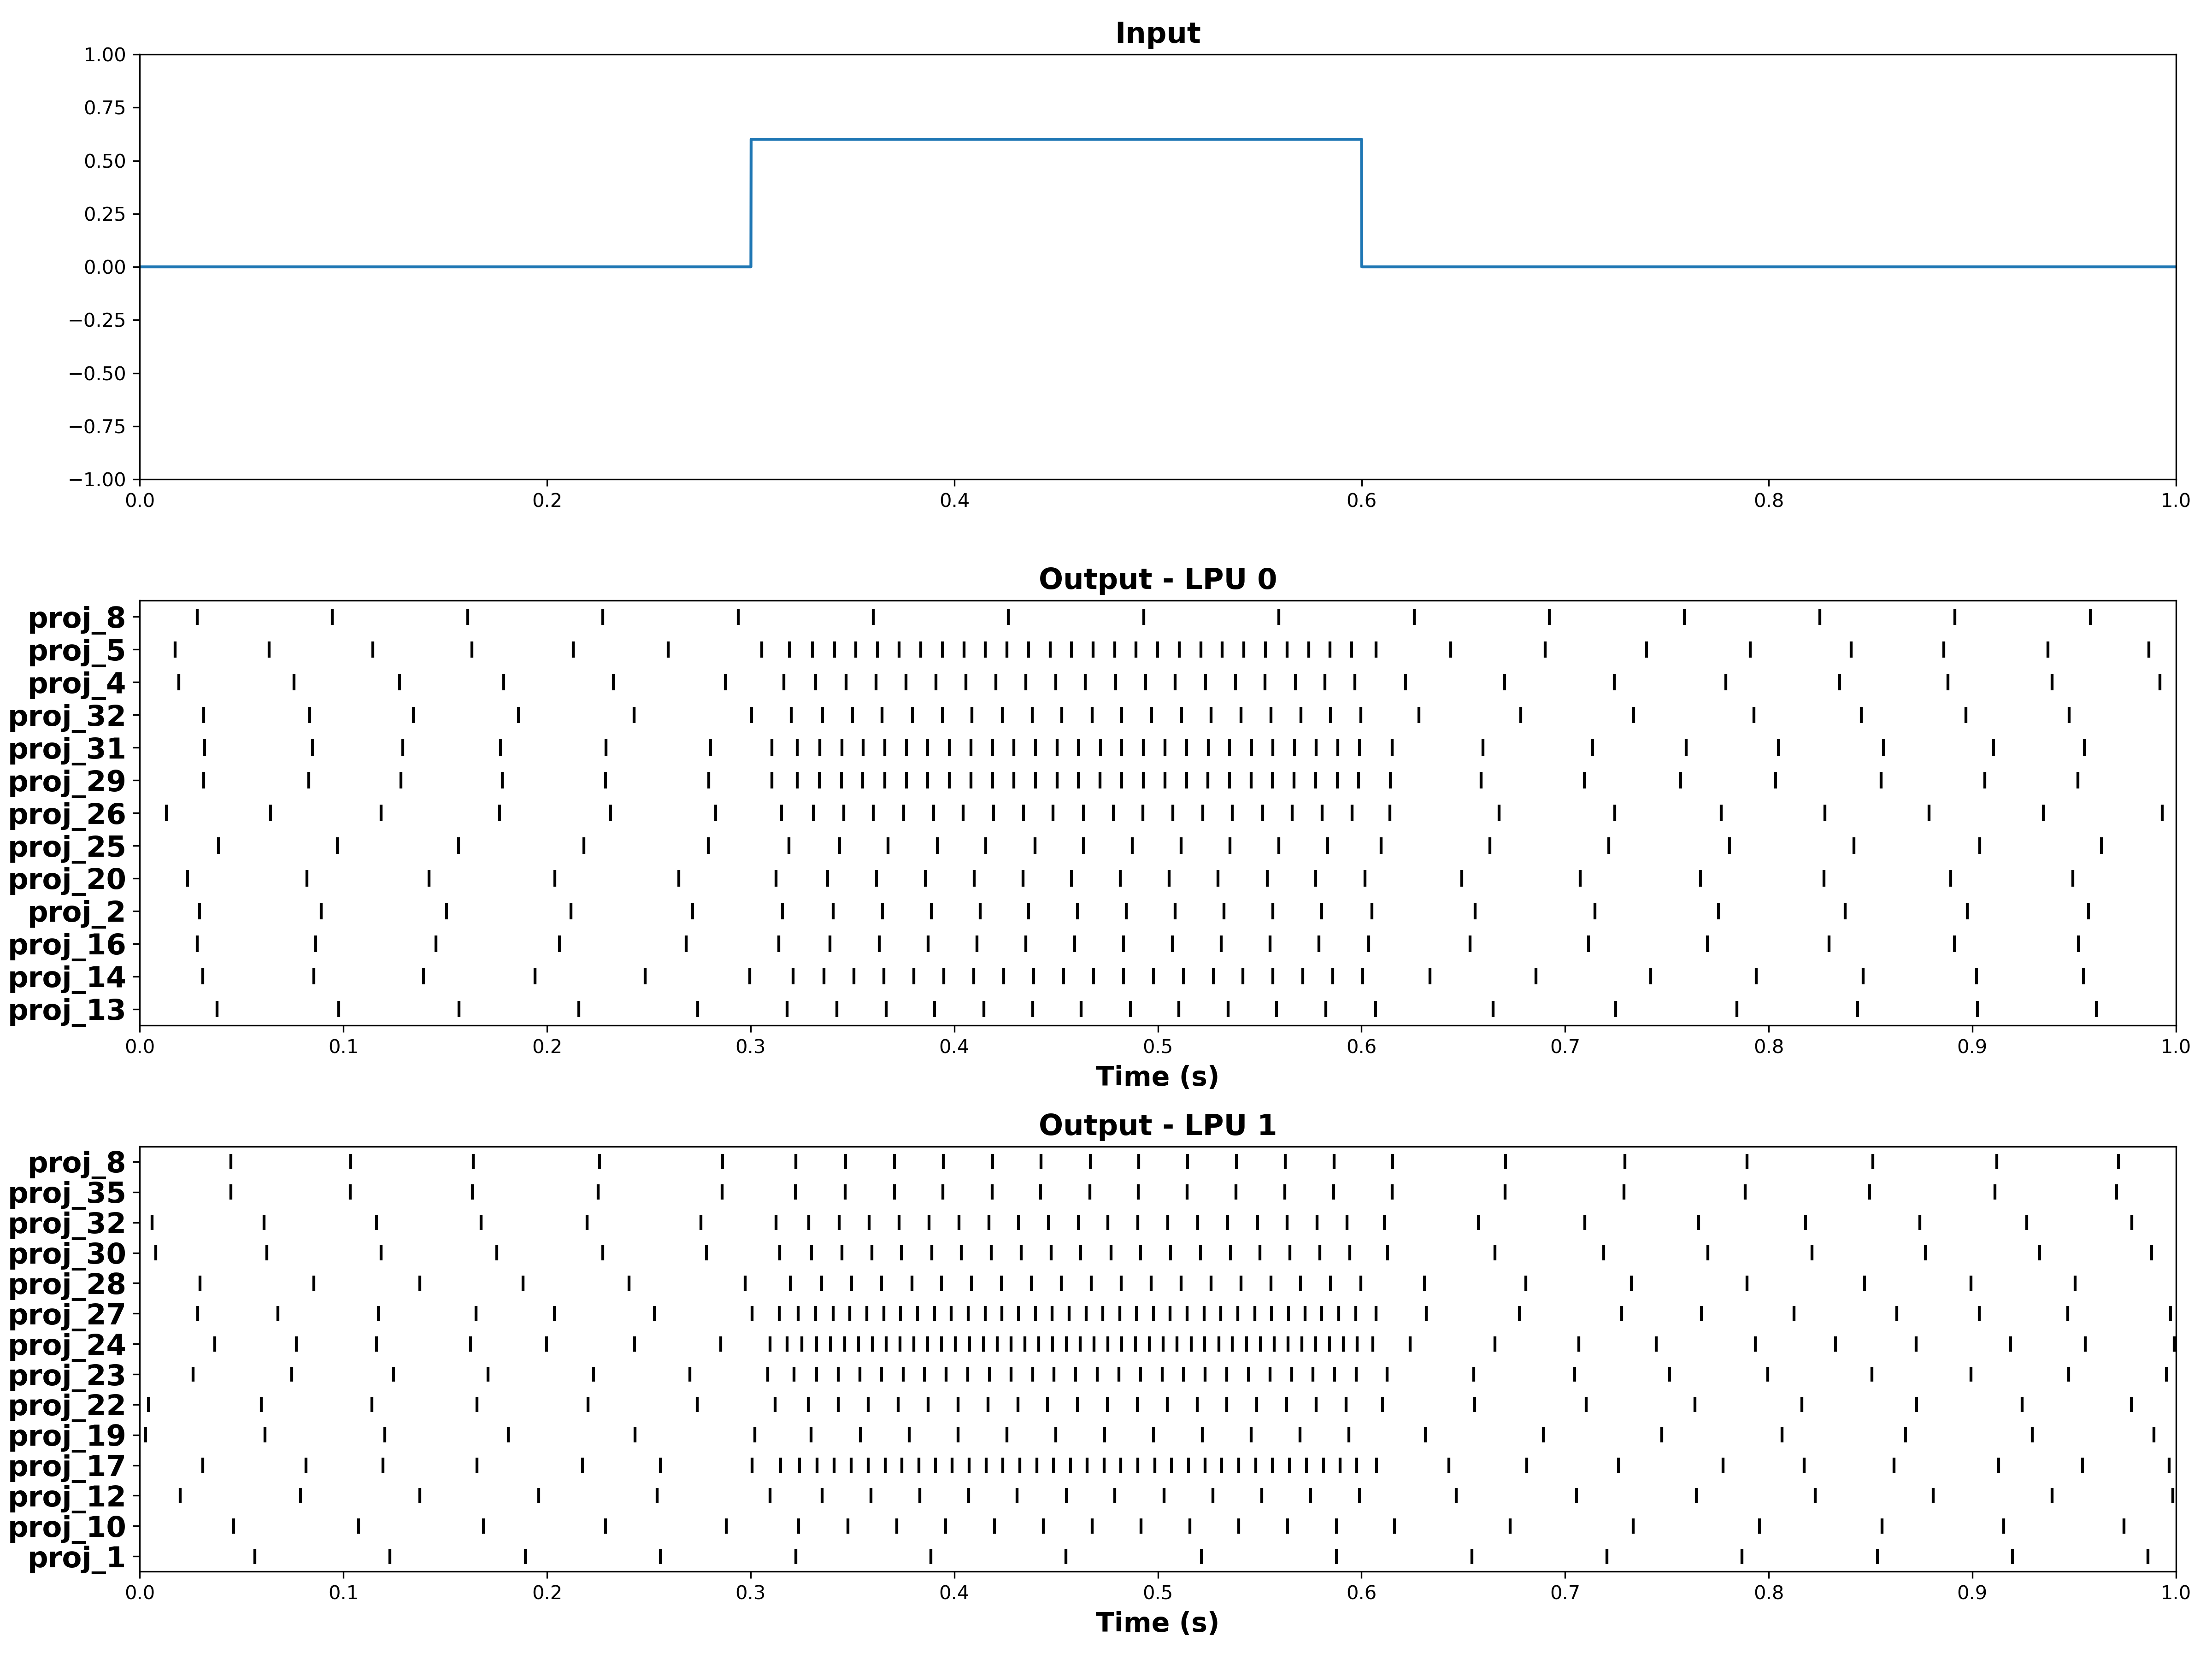

In [16]:
from IPython.display import Image

Image(filename = 'intro_output.png')

Here is the output of the LPUs with synaptic connections from neurons in LPU 0 to LPU 1 rendered to video:

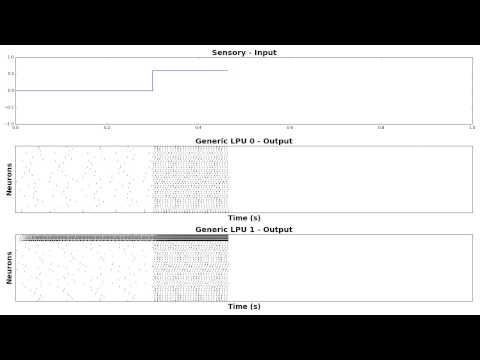

In [17]:
import IPython
IPython.display.YouTubeVideo('U2FGNbQ5ibg')

To experiment with running LPUs unconnected please see neurodriver/examples/intro/intro_demo.py. The below video shows the output of two unconnected LPUs. 

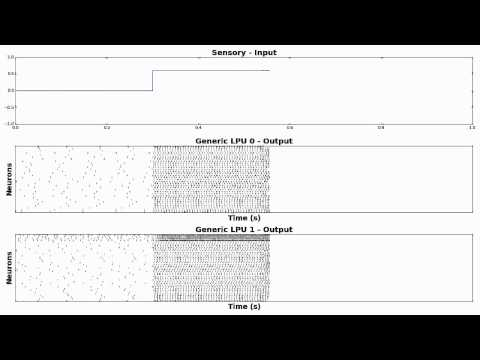

In [18]:
import IPython
IPython.display.YouTubeVideo('FY810D-hhD8')

If one compares the two videos, one will observe that the output of LPU 0 in both videos remains the same while that of LPU 1 exhibits changes when connected to LPU 0. This confirms that the one-way connectivity pattern defined earlier is transmitting data from one LPU to the other during model execution.

### References

<a name="chiang_three-dimensional_2011"></a>Chiang, A.-S., Lin, C.-Y., Chuang, C.-C., Chang, H.-M., Hsieh, C.-H., Yeh, C.-W., et al. (2011), Three-dimensional reconstruction of brain-wide wiring networks in Drosophila at single-cell resolution, Current Biology, 21, 1, 1–11, doi:10.1016/j.cub.2010.11.056